# Giới thiệu bài toán

Trong bài này, tôi sẽ giới thiệu một trong những thuật toán cơ bản nhất (và đơn giản nhất) của Machine Learning. Đây là một thuật toán Supervised learning có tên **Linear Regression** (Hồi Quy Tuyến Tính). Bài toán này đôi khi được gọi là **Linear Fitting** (trong thống kê) hoặc **Linear Least Square**.

**Ví dụ:** một căn nhà rộng $x_1^3,\ \text{m}^2$\, có $x_2$ phòng ngủ và cách trung tâm thành phố $x_3$ (km) có giá là bao nhiêu. Giả sử chúng ta đã có số liệu thống kê từ 1000 căn nhà trong thành phố đó, liệu rằng khi có một căn nhà mới với các thông số về diện tích, số phòng ngủ và khoảng cách tới trung tâm, chúng ta có thể dự đoán được giá của căn nhà đó không?

Một cách đơn giản nhất, chúng ta có thể thấy rằng: 
i) diện tích nhà càng lớn thì giá nhà càng cao; 
ii) số lượng phòng ngủ càng lớn thì giá nhà càng cao; 
iii) càng xa trung tâm thì giá nhà càng giảm. Một hàm số đơn giản nhất có thể mô tả mối quan hệ giữa giá nhà và 3 đại lượng đầu vào là:
$$ y\approx f(x)=\hat{y} \\ f(x) = w_1x_1+w_2x_2+w_3x_3 +w_0 $$
trong đó, $w_1,\ w_2,\ w_3,\ w_0$ là các hằng số, $w_0$ còn được gọi là bias. Mối quan hệ $y \approx f(x)$ bên trên là một mối quan hệ tuyến tính (linear). Bài toán chúng ta đang làm là một bài toán thuộc loại regression. Bài toán đi tìm các hệ số tối ưu $\{w_1,\ w_2,\ w_3,\ w_0\}$ chính vì vậy được gọi là bài toán Linear Regression.

Điểm tối ưu của bài toán Linear Regression có dạng:
$$\bf w = \left( X^{\text{T}}X^{\text{T}} \right)^{-1}X^{\text{T}}y$$

## Giải bài toán quy hoạch tuyến tính dùng CVXPY

## Ví dụ 1:
Chúng ta có 1 bảng dữ liệu về chiều cao và cân nặng của 15 người như dưới đây:
![linear_regression](img/LR_1.png)

**Bài toán đặt ra là:** liệu có thể dự đoán cân nặng của một người dựa vào chiều cao của họ không? (Trên thực tế, tất nhiên là không, vì cân nặng còn phụ thuộc vào nhiều yếu tố khác nữa, thể tích chẳng hạn). 

Chúng ta có thể thấy là cân nặng sẽ tỉ lệ thuận với chiều cao (càng cao càng nặng), nên có thể sử dụng Linear Regression model cho việc dự đoán này. Để kiểm tra độ chính xác của model tìm được, chúng ta sẽ giữ lại cột 155 và 160 cm để kiểm thử, các cột còn lại được sử dụng để huấn luyện (train) model.

Chúng ta sẽ so sánh nghiệm của bài toán khi giải theo lý thuyết và nghiệm tìm được khi dùng thư viện [scikit-learn](https://scikit-learn.org/stable/tutorial/index.html) của Python.

Trước tiên, chúng ta cần có hai thư viện numpy cho đại số tuyến tính và matplotlib cho việc vẽ hình.

In [26]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

Tiếp theo, chúng ta khai báo và biểu diễn dữ liệu trên một đồ thị.

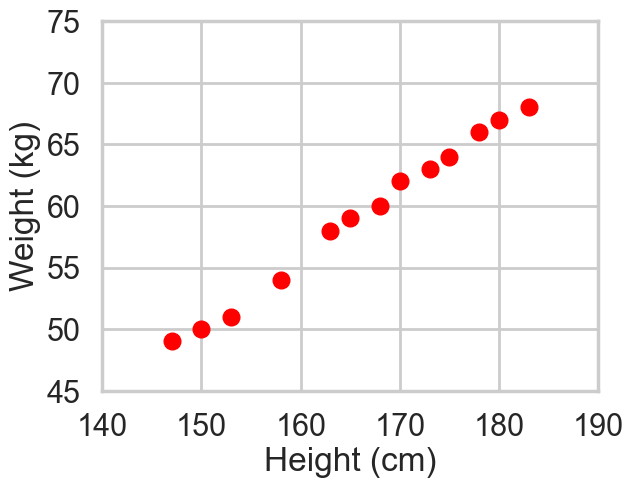

In [27]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Từ đồ thị này ta thấy rằng dữ liệu được sắp xếp gần như theo 1 đường thẳng, vậy mô hình Linear Regression nhiều khả năng sẽ cho kết quả tốt:
$$\text{(cân nặng)}\ =\ w_1\text{*(chiều cao)} + w_0$$

### Nghiệm theo công thức

Tiếp theo, chúng ta sẽ tính toán các hệ số $w_1$ và $w_0$ dựa vào công thức lý thuyết. Chú ý: giả nghịch đảo của một ma trận A trong Python sẽ được tính bằng [numpy.linalg.pinv(A)](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html), pinv là từ viết tắt của pseudo inverse.

w =  [[-33.73541021]
 [  0.55920496]]


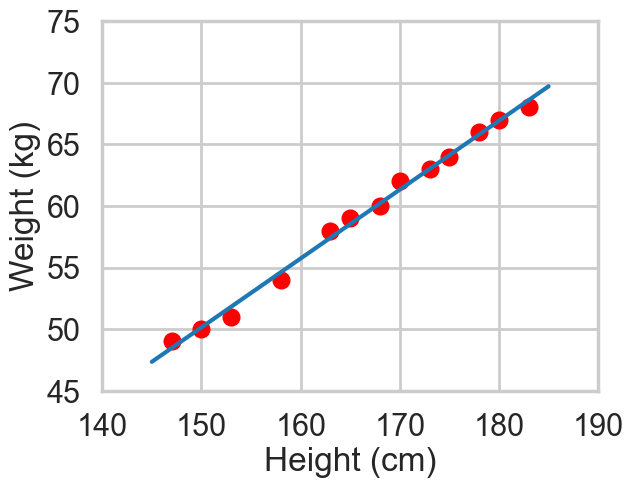

In [28]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Từ đồ thị bên trên ta thấy rằng các điểm dữ liệu màu đỏ nằm khá gần đường thẳng dự đoán màu xanh. Vậy mô hình Linear Regression hoạt động tốt với tập dữ liệu training. Bây giờ, chúng ta sử dụng mô hình này để dự đoán cân nặng của hai người có **chiều cao 155 và 160 cm** mà chúng ta đã không dùng khi tính toán nghiệm.

In [29]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


Chúng ta thấy rằng kết quả dự đoán khá gần với số liệu thực tế.

### Nghiệm theo thư viện scikit-learn

Tiếp theo, chúng ta sẽ sử dụng thư viện scikit-learn của Python để tìm nghiệm.

In [30]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


Chúng ta thấy rằng hai kết quả thu được như nhau!

# Sử dụng CVXPY

## Ví dụ: 
Giả sử số ca mắc sốt xuất huyết và lượng mưa trong tháng qua thống kê trong 3 năm được mô tả ở hình dưới đây:
![linear_regression](img/LR_2.png)
![linear_regression](img/LR_3.png)

Chương trình Python sử dụng thư viện CVXPY để giải bài toán tối ưu có dạng như sau:

## Giải bài toán quy hoạch tuyến tính dùng CVXPY

In [31]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [32]:
X = np.array((55,102,169,177,185,236,252,269,359,380,386,115, 11,16,137,149,216,
               234,251,253,356,364,372,362, 36,58,63,77,282,287,304,305,370,374,399,279))

Y = np.array((163,239,227,364,265,354,325,364,577,529,544,214, 109,9,155,179,339,
               434,410,373,546,486,536,471,189,275,51,184,293,501,431,462,457,514,486,461))

Thêm cột $X0=1$ tương ứng với $w[0]$ để tạo ma trận X\_new:

In [33]:
X0 = np.ones((np.shape(X)[0]))
X_new = np.column_stack(([X0,X]))

Định nghĩa hàm mục tiêu:

In [34]:
def obj_fn(X, Y, beta):
    return cp.pnorm(X @ weight - Y, p=2)**2

Tạo bài toán tối ưu và giải bằng CVXPY:

In [35]:
weight = cp.Variable(np.shape(X_new)[1])
problem = cp.Problem(cp.Minimize(obj_fn(X_new, Y, weight)))
problem.solve()
print(weight.value)

[79.96963936  1.16955012]


Dùng đoạn code sau để vẽ đường tuyến tính $w^{\text{T}}x$, ta được hình dưới đây.

Text(0, 0.5, 'y')

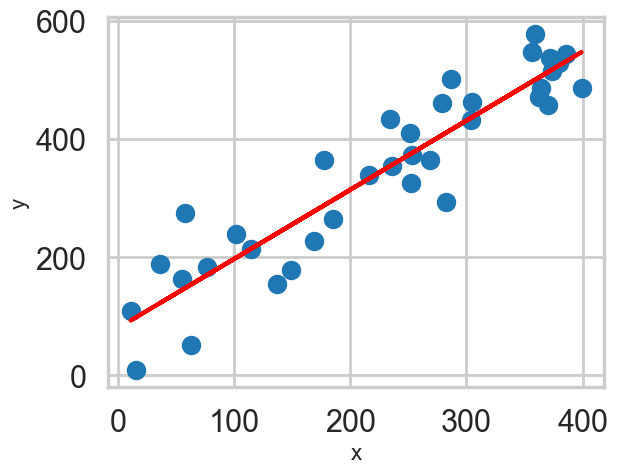

In [36]:
Y_est=X.dot(weight.value[1]) + weight.value[0]
plt.scatter(X, Y)
plt.plot(X,Y_est, 'r')
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)

# Hồi quy tuyến tính bằng Python scikit-Learn

Scikit-learn là một module Python mạnh mẽ cho việc học máy. Nó chứa hàm cho hồi quy, phân loại, phân cụm, lựa chọn mô hình và giảm kích chiều. Chúng ta sẽ khám phá module `sklearn.linear_model` có chứa "các method để thực hiện hồi quy, trong đó giá trị mục tiêu sẽ là sự kết hợp tuyến tính của các biến đầu vào".

Trong bài đăng này, chúng ta sẽ sử dụng bộ dữ liệu Nhà ở Boston, bộ dữ liệu chứa thông tin về giá trị nhà cửa ở ngoại ô thành phố Boston. Tập dữ liệu này ban đầu được lấy từ thư viện StatLib được duy trì tại Đại học Carnegie Mellon và bây giờ đã có trên UCI Machine Learning Repository.

Bộ Dữ liệu Nhà ở Boston bao gồm giá nhà ở những nơi khác nhau ở Boston. Cùng với giá cả, tập dữ liệu cũng cung cấp thông tin như Tội phạm (CRIM), các khu vực kinh doanh không-bán-lẻ ở thị trấn (INDUS), tuổi chủ sở hữu ngôi nhà (AGE) và có nhiều thuộc tính khác có sẵn ở đây . Bộ dữ liệu chính nó có thể down từ đây . Tuy nhiên, vì chúng ta sử dụng `scikit-learn`, chúng ta có thể import nó từ `scikit-learn`.

In [37]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


Trước hết, chúng ta sẽ import bộ dữ liệu Boston Housing và lưu trữ nó trong một biến gọi là boston. Để import nó từ `scikit-learn`, chúng ta sẽ cần phải chạy đoạn mã này.

In [38]:
from sklearn.datasets import load_boston
boston = load_boston()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Biến `boston` là một dạng từ điển, vì vậy chúng ta có thể kiểm tra `key` của nó sử dụng đoạn mã bên dưới.

In [ ]:
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
print(boston.data.shape)


(506, 13)


Như chúng ta có thể thấy nó trả về `(506, 13)`, có nghĩa là có 506 hàng dữ liệu với 13 cột. Bây giờ chúng ta muốn biết 13 cột là gì. Chúng ta sẽ chạy đoạn code sau :

In [ ]:
print(boston.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Bạn có thể dùng lệnh `print(boston.DESCR)` để kiểm tra description của dữ liệu thay vì mở web để đọc.

Tiếp, convert dữ liệu về dạng pandas! Rất đơn giản, gọi hàm `pd.DataFrame()` và truyền `boston.data`. Chúng ta có thể kiểm tra 5 dữ liệu đầu tiên bằng `bos.head()`.

In [ ]:
bos = pd.DataFrame(boston.data)
print(bos.head())


        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


Hoặc bạn co thể dùng đoạn lệnh sau để show được tên cột

In [ ]:
bos.columns = boston.feature_names
print(bos.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Có vẻ vẫn chưa có column tên là `PRICE`.

In [ ]:
bos['PRICE'] = boston.target
print(bos.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


Nếu bạn muốn nhìn các số liệu tổng hợp thống kê, hãy chạy đoạn mã sau .

In [ ]:
print(bos.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Tách dữ liệu để train-test

Về cơ bản, trước khi chia dữ liệu thành tập dữ liệu để train - test, chúng ta cần chia dữ liệu thành hai giá trị : giá trị đích và giá trị dự báo. Hãy gọi giá trị đích Y và các giá trị dự báo X. Như vậy,

In [ ]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']


Bây giờ chúng ta có thể split dữ liệu để train và test với snippet như sau.

In [ ]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(339, 13)
(167, 13)
(339,)
(167,)


## Linear Regression


Tiếp, chúng ta sẽ chạy hồi quy tuyến tính.

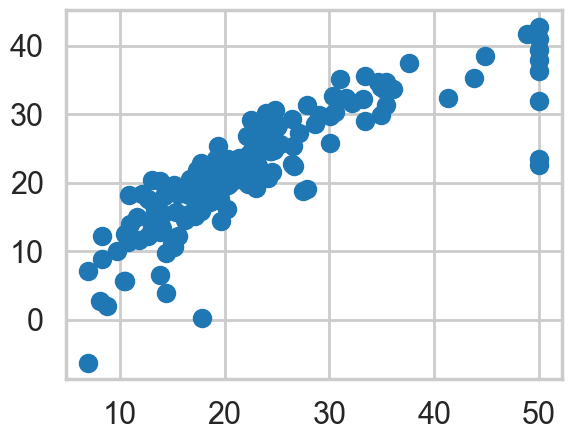

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
# plt.xlabel("Prices: $Y_i$")
# plt.ylabel("Predicted prices: $\hat{Y}_i$")
# plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


## Trung bình diện tích sai số


Để kiểm tra mức độ lỗi của một mô hình, chúng ta có thể sử dụng `Mean Squared Error`. Đây là một trong các phương pháp để đo trung bình của ô vuông của sai số. Về cơ bản, nó sẽ kiểm tra sự khác biệt giữa giá trị thực tế và giá trị dự đoán. Để sử dụng nó, chúng ta có thể sử dụng hàm bình phương trung bình sai số của `scikit-learn` bằng cách chạy đoạn mã này

In [ ]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)


28.530458765974643


# Làm bài tập file Exercise.ipynb
